> # KNN - 1

> ## Import the libraries and Read the data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv(r'breast-cancer.csv')

> ## Exploratory Data Analysis

In [2]:
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
data.shape

(698, 11)

In [4]:
data.columns

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

#### Renaming the columns

In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
data.columns = col_names

In [6]:
data.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


#### Dropping unwanted column - Id

In [7]:
data = data.drop(['Id'],axis=1)

#### Checking for Null Values

In [8]:
data.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
data.dtypes

Clump_thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

#### Bare_Nuclei has integer values but it's dtype is object
#### Changing the dtype of Bare_Nuclei

In [10]:
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

##### Data parsing is converting data from one format to another
##### errors{‘ignore’, ‘raise’, ‘coerce’}
*     If ‘raise’, then invalid parsing will raise an exception.
*     If ‘coerce’, then invalid parsing will be set as NaN.
*     If ‘ignore’, then invalid parsing will return the input.

In [11]:
data.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [12]:
data.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

#### Removing Outliers

In [13]:
def iqr(data,col):
    q1,q3 = np.percentile(data[col],[25,75])
    iqr = q3-q1 
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    data = data[(data[col]>lower) & (data[col]<upper)]
    data.boxplot(col)

In [14]:
l = ['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

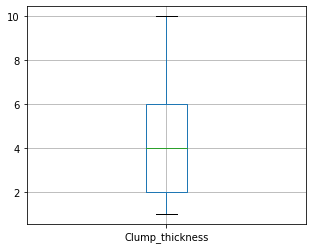

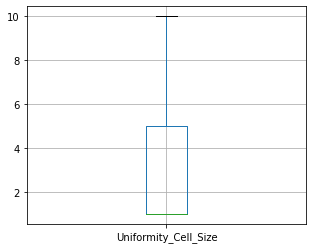

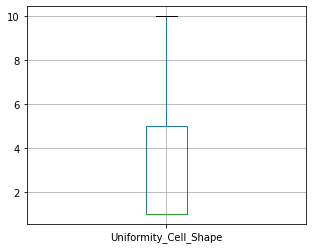

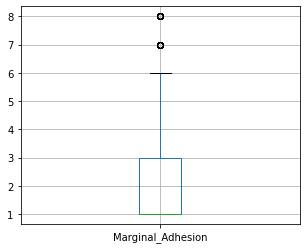

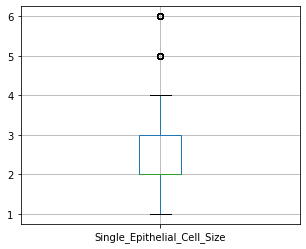

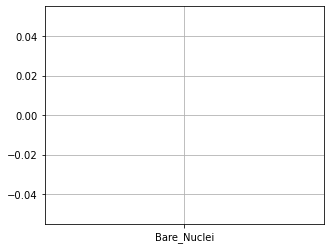

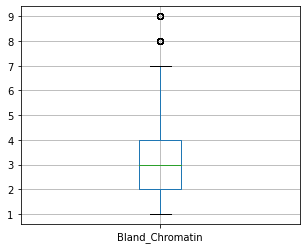

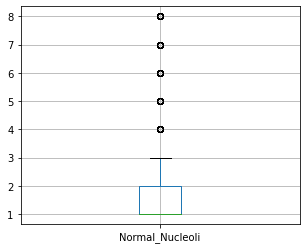

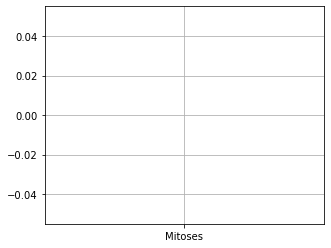

In [15]:
for i in data[l]:
    plt.figure(figsize=(5,4))
    iqr(data,i)
    plt.show()

> ## Data Visualisation

#### Univariate Analysis

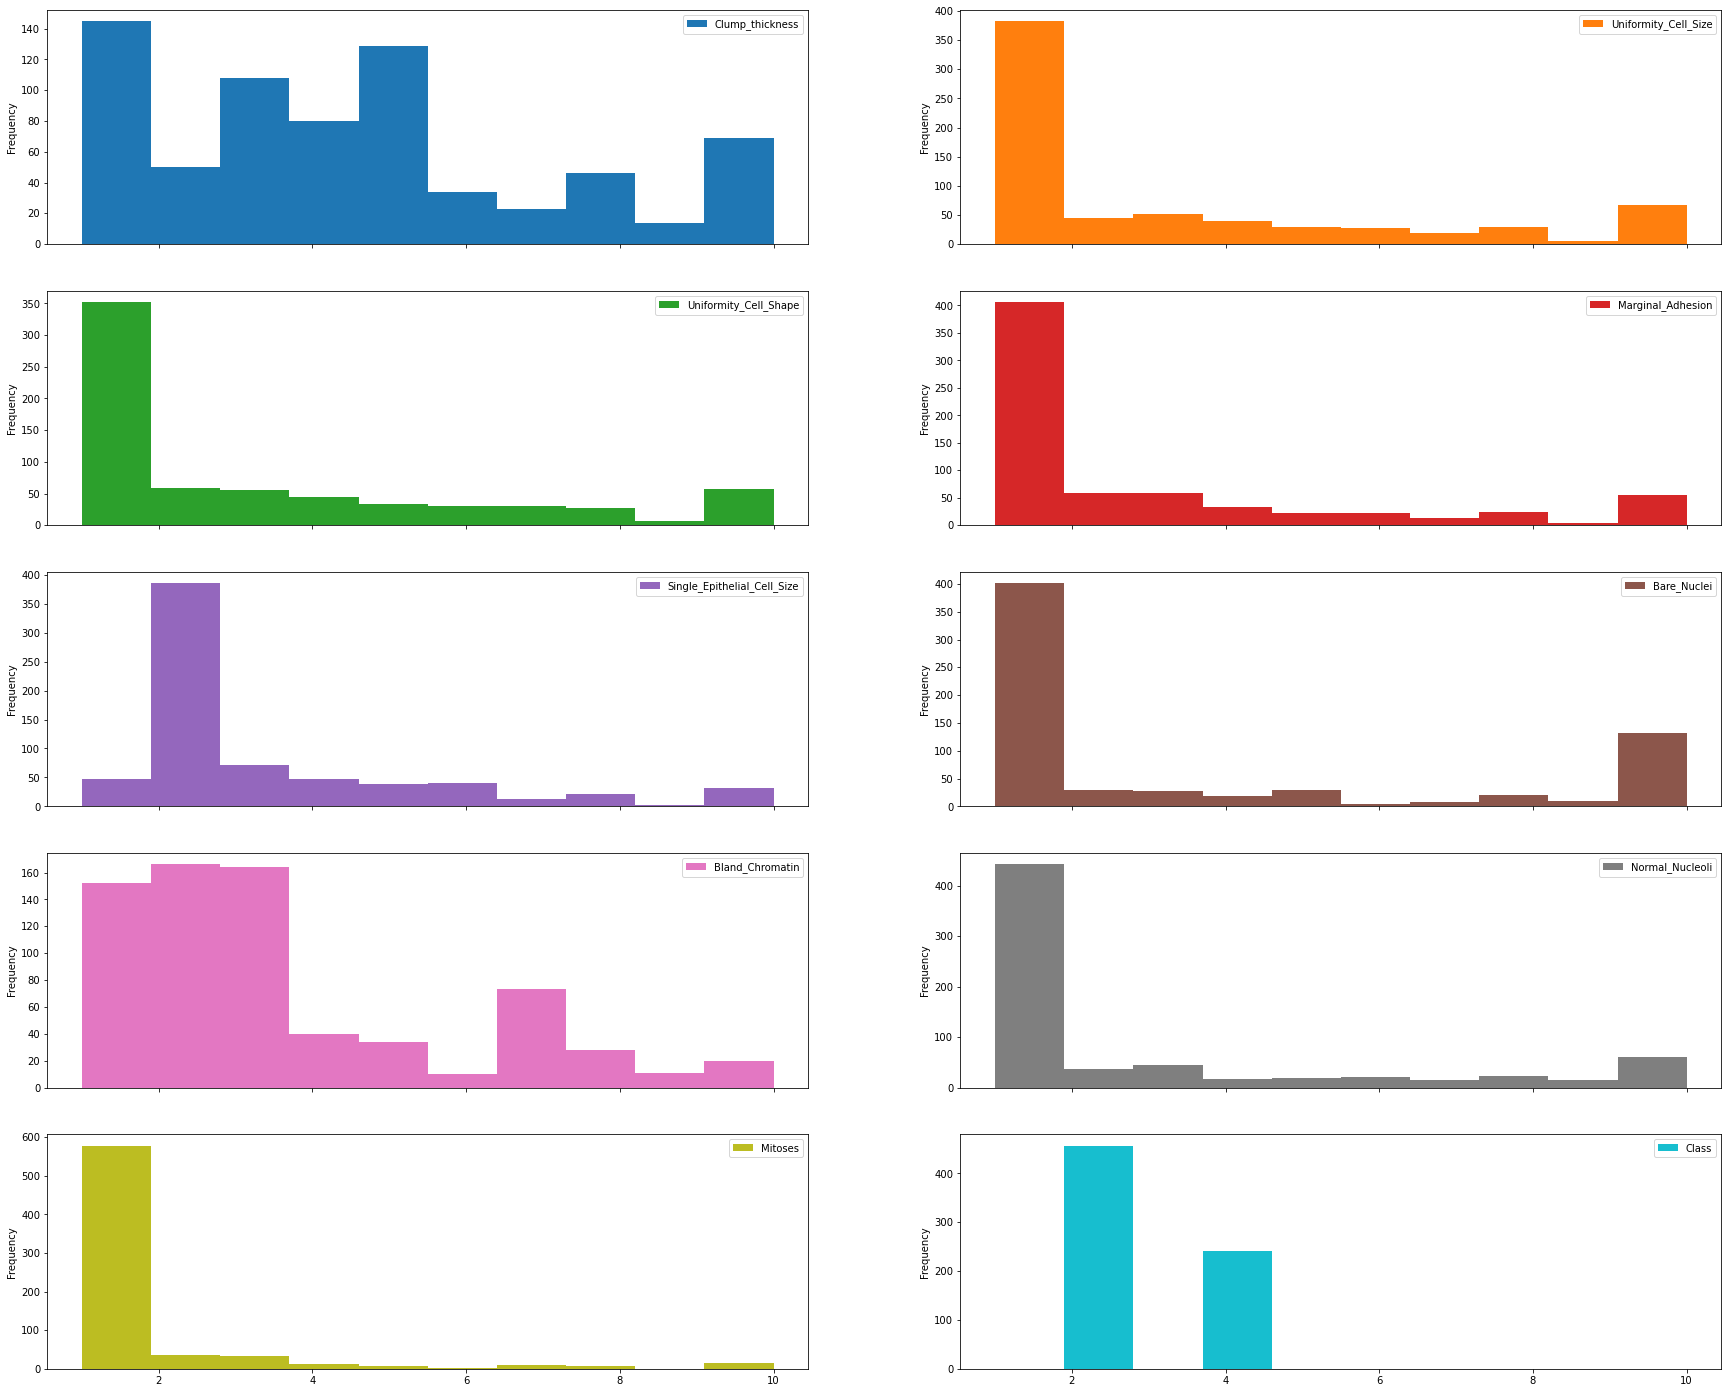

In [16]:
plt.rcParams['figure.figsize']=(30,25)
data.plot(kind='hist', subplots=True, layout=(5,2))
plt.show()

#### Multivariate Analysis

In [17]:
data.corr()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.593524,0.558511,0.536176,0.350176,0.716509
Uniformity_Cell_Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.691487,0.755824,0.722699,0.458548,0.817772
Uniformity_Cell_Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.713661,0.736066,0.719272,0.438756,0.818794
Marginal_Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.670434,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.585489,0.616108,0.628704,0.478975,0.682618
Bare_Nuclei,0.593524,0.691487,0.713661,0.670434,0.585489,1.000000,0.680689,0.584022,0.339005,0.822563
Bland_Chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,0.680689,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.584022,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.339005,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.817772,0.818794,0.696605,0.682618,0.822563,0.756732,0.712067,0.423008,1.000000


In [18]:
data.corr()['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822563
Uniformity_Cell_Shape          0.818794
Uniformity_Cell_Size           0.817772
Bland_Chromatin                0.756732
Clump_thickness                0.716509
Normal_Nucleoli                0.712067
Marginal_Adhesion              0.696605
Single_Epithelial_Cell_Size    0.682618
Mitoses                        0.423008
Name: Class, dtype: float64

#### Interpretation
The correlation coefficient ranges from -1 to +1.

* When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.
* When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.
* We can see that all the variables are positively correlated with Class variable. Some variables are strongly positive correlated while some variables are negatively correlated.

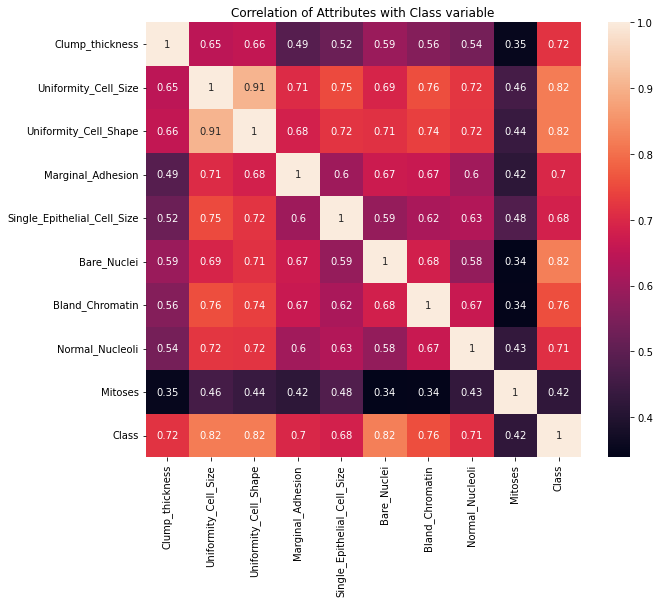

In [19]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
sns.heatmap(data.corr(), square=True, annot=True)           
plt.show()

#### Interpretation
From the above correlation heat map, we can conclude that :-

1. Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).
2. Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).
3. Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).
4. The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

In [20]:
data.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [21]:
data['Bare_Nuclei'].value_counts()

1.0     401
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bare_Nuclei', ylabel='Density'>

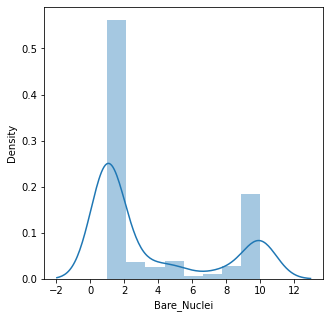

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(data['Bare_Nuclei'])

In [23]:
data['Bare_Nuclei'] = data['Bare_Nuclei'].fillna(data['Bare_Nuclei'].mean())

In [24]:
data['Bare_Nuclei'].isnull().sum()

0

> ## Declare feature vector and target variable 

In [25]:
x = data.drop(['Class'], axis=1)
y = data['Class']

> ## Split data into separate training and test set

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [27]:
# check the shape of x_train and x_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((488, 9), (488,), (210, 9), (210,))

> ## Feature Engineering


Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [28]:
x_train.isnull().sum(), y_train.isnull().sum(), x_test.isnull().sum(), y_test.isnull().sum()

(Clump_thickness                0
 Uniformity_Cell_Size           0
 Uniformity_Cell_Shape          0
 Marginal_Adhesion              0
 Single_Epithelial_Cell_Size    0
 Bare_Nuclei                    0
 Bland_Chromatin                0
 Normal_Nucleoli                0
 Mitoses                        0
 dtype: int64,
 0,
 Clump_thickness                0
 Uniformity_Cell_Size           0
 Uniformity_Cell_Shape          0
 Marginal_Adhesion              0
 Single_Epithelial_Cell_Size    0
 Bare_Nuclei                    0
 Bland_Chromatin                0
 Normal_Nucleoli                0
 Mitoses                        0
 dtype: int64,
 0)

> ## Feature Scaling

In [29]:
x_train.shape, x_test.shape

((488, 9), (210, 9))

In [30]:
cols = x_train.columns
cols

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### StandardScaler() - function to standardize the data values into a standard format
1. Fit(): Method calculates the parameters μ and σ and saves them as internal objects.
1. Transform(): Method using these calculated parameters apply the transformation to a particular dataset.
1. Fit_transform(): joins the fit() and transform() method for transformation of dataset.

In [32]:
x_train

array([[-1.22335734, -0.04142794, -0.05266252, ...,  1.44321336,
        -0.27073637, -0.33029174],
       [-1.22335734, -0.68323229, -0.720177  , ..., -0.99517597,
        -0.59297869, -0.33029174],
       [-1.22335734, -0.68323229, -0.720177  , ..., -0.58877775,
        -0.59297869, -0.33029174],
       ...,
       [ 0.5629933 , -0.36233012, -0.05266252, ..., -0.99517597,
        -0.59297869, -0.33029174],
       [ 0.20572317, -0.68323229, -0.720177  , ..., -0.18237953,
        -0.59297869, -0.33029174],
       [-1.22335734, -0.68323229, -0.720177  , ..., -0.99517597,
        -0.59297869, -0.33029174]])

In [33]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [34]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-1.223357,-0.041428,-0.052663,-0.271982,-0.541317,-0.680544,1.443213,-0.270736,-0.330292
1,-1.223357,-0.683232,-0.720177,-0.624980,-0.984544,-0.680544,-0.995176,-0.592979,-0.330292
2,-1.223357,-0.683232,-0.720177,-0.624980,-0.541317,-0.680544,-0.588778,-0.592979,-0.330292
3,-1.223357,-0.683232,-0.720177,-0.624980,-0.984544,-0.680544,-0.588778,-0.592979,-0.330292
4,1.992074,2.204887,2.283638,1.493008,2.561267,1.830905,1.443213,2.307202,5.143826
...,...,...,...,...,...,...,...,...,...
483,0.562993,2.204887,2.283638,2.552002,3.004493,1.830905,1.849612,2.307202,5.143826
484,-1.223357,-0.683232,-0.720177,-0.624980,-0.541317,-0.680544,-0.182380,-0.592979,-0.330292
485,0.562993,-0.362330,-0.052663,-0.624980,-0.541317,-0.680544,-0.995176,-0.592979,-0.330292
486,0.205723,-0.683232,-0.720177,-0.624980,-0.541317,-0.680544,-0.182380,-0.592979,-0.330292


> ## Fit K Neighbours Classifier to the training set

In [35]:
x_train.shape, y_train.shape

((488, 9), (488,))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=3)

> ## Predict test-set results 

In [37]:
y_pred = knn.predict(x_test)
y_pred

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2], dtype=int64)

> ## Check accuracy score 

In [38]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9571


> ## Check for overfitting and underfitting

In [39]:
print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(x_test, y_test)))

Training set score: 0.9795
Test set score: 0.9571


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


> ## Compare model accuracy with null accuracy

So, the model accuracy is 0.9571. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [40]:
y_test.value_counts()

2    133
4     77
Name: Class, dtype: int64

We can see that the occurences of most frequent class is 133. So, we can calculate null accuracy by dividing 133 by total number of occurences.

In [41]:
null_accuracy = (133/(133+77))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6333


We can see that our model accuracy score is 0.9571 but null accuracy score is 0.6333. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

> ## Rebuild kNN Classification model using different values of k

In [42]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(x_train, y_train)

y_pred_5 = knn_5.predict(x_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9571


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(x_train, y_train)

y_pred_6 = knn_6.predict(x_test)

print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9571


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [44]:
knn_7 = KNeighborsClassifier(n_neighbors=6)

knn_7.fit(x_train, y_train)

y_pred_7 = knn_7.predict(x_test)

print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9571


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


> ## Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

* True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

* True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

* False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

* False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[129   4]
 [  5  72]]

True Positives(TP) =  129

True Negatives(TN) =  72

False Positives(FP) =  4

False Negatives(FN) =  5


In [46]:
cm_6 = confusion_matrix(y_test, y_pred_6)

print('Confusion matrix\n\n', cm_6)

Confusion matrix

 [[129   4]
 [  5  72]]


##### k = 3 itself is giving us the best results

<AxesSubplot:>

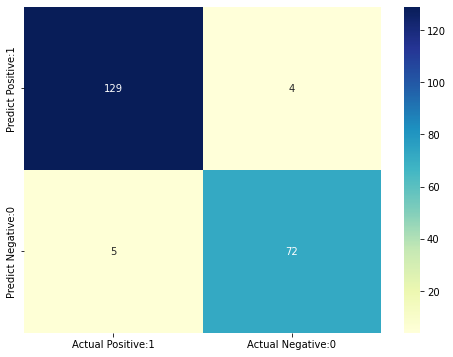

In [47]:
plt.figure(figsize=(8,6))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

> ## Classification metrices

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       133
           4       0.95      0.94      0.94        77

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [49]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [50]:
# Classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# Precision
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

# Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# F1 Score
F1 = (2*(precision*recall))+(precision+recall)
print('F1 Score : {0:0.4f}'.format(F1))

Classification accuracy : 0.9571
Classification error : 0.0429
Precision : 0.9699
Recall or Sensitivity : 0.9627
F1 Score : 3.8001


> ## k-fold Cross Validation

Apply k-fold Cross Validation technique to improve the model performance. Cross-validation is a statistical method of evaluating generalization performance It is more stable and thorough than using a train-test split to evaluate model performance.

In [51]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[1.         0.93877551 1.         0.97959184 0.89795918 0.95918367
 0.97959184 0.97959184 0.97916667 0.95833333]
Average cross-validation score: 0.9672


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklea

#### Interpretation
* Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

* If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 89.79% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

* We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.

> # kNN - 2 - From Scratch

In [52]:
from sklearn.datasets import load_iris
x = load_iris()

In [53]:
x, y = x.data, x.target

In [54]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.25,random_state=42)

In [55]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]  
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [56]:
knn = KNN(k=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score as sc
sc(y_pred,y_test)

1.0